<a href="https://colab.research.google.com/github/npcrites/DS_002/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clone your code into a directory called `byscratch`
# 
! rm -Rf byscratch ;
!git clone https://github.com/douglasgoodwin/byscratch.git byscratch

Cloning into 'byscratch'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 46 (delta 16), reused 28 (delta 7), pack-reused 0
Unpacking objects: 100% (46/46), done.
Checking out files: 100% (20/20), done.


In [ ]:
!pip install mnist

In [ ]:
from byscratch.deep_learning import *

<Figure size 432x288 with 0 Axes>

In [ ]:
# python imports
from typing import List, Callable, Iterable, Tuple
import random
import math
import json
import operator

# local imports
from byscratch.neural_networks import sigmoid
from byscratch.probability import inverse_normal_cdf
from byscratch.linear_algebra import dot
from byscratch.linear_algebra import squared_distance
from byscratch.neural_networks import binary_encode, fizz_buzz_encode, argmax

# 3rd party imports
import matplotlib.pyplot as plt
import tqdm
import mnist

# not a byscratch
import pandas as pd

# Deep Neural Network Keras way

https://www.kaggle.com/code/poonaml/deep-neural-network-keras-way

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
# from keras.optimizers import Adam ,RMSprop
from tensorflow.keras.optimizers import Adam,RMSprop

from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the "byscratch/data/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./byscratch/data"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

adult_9ksample.csv
adult_original.csv
adult_stratified_income.csv
bike_sharing_daily.csv
bike_sharing_hourly.csv
mnist_test.csv
mnist_train.csv



In [ ]:
# create the training & test sets, skipping the header row with [1:]
train = pd.read_csv("byscratch/data/mnist_train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test= pd.read_csv("byscratch/data/mnist_test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

# Data Visualization
Lets look at 3 images from data set with their labels.

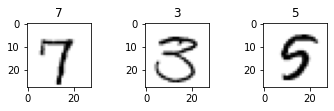

In [ ]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray_r'))
    plt.title(y_train[i]);

In [ ]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

# Preprocess the digit images
## Feature Standardization

It is important preprocessing step. It is used to centre the data around zero mean and unit variance.

In [ ]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

# One Hot encoding of labels.

## This is another term for the `dummy()` function we saw last week.

A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

For example, 3 would be [0,0,0,1,0,0,0,0,0,0].

In [ ]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


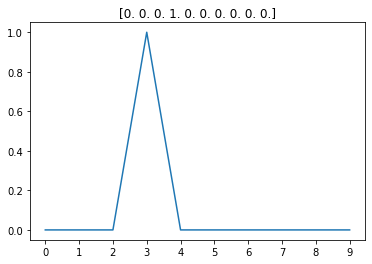

In [ ]:
# Lets plot 10th label.

plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

# Design Neural Network Architecture

In [ ]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [ ]:
# Linear Model
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

# Create a simple model from Keras Sequential layer.

1. Lambda layer performs simple arithmetic operations like sum, average, exponentiation etc.
In 1st layer of the model we have to define input dimensions of our data in (rows,columns,colour channel) format. (In theano colour channel comes first)
2. Flatten will transform input into 1D array.
3. Dense is fully connected layer that means all neurons in previous layers will be connected to all neurons in fully connected layer. In the last layer we have to specify output dimensions/classes of the model. Here it's 10, since we have to output 10 different digit labels.

In [ ]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


# Compile network
Before making network ready for training we have to make sure to add below things:

1. A loss function: to measure how good the network is
2. An optimizer: to update network as it sees more data and reduce loss value
3. Metrics: to monitor performance of network

In [ ]:
# from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [ ]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

# Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
batch_size=64

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches=gen.flow(X_val, y_val, batch_size=batch_size)

In [ ]:
steps_per_epoch = len(X_train)//batch_size
validation_steps = len(X_test)//batch_size # if you have validation data 

history=model.fit(batches, 
                            steps_per_epoch=batches.n, 
                            epochs=5, 
                            validation_data=val_batches, 
                            validation_steps=batches.n
                           )

Epoch 1/5
37800/37800 [==============================] - 4s 86us/step - loss: 0.4522 - accuracy: 0.8648 - val_loss: 0.3286 - val_accuracy: 0.9081


(Don't worry is the first try runs out of data)

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

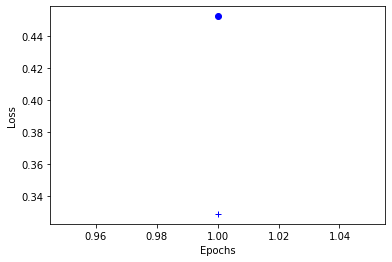

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

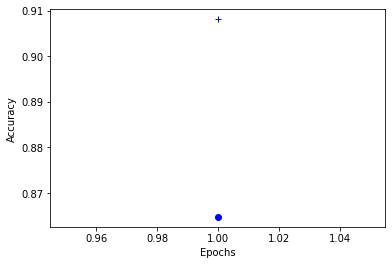

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

# Fully Connected Model¶
Neurons in a fully connected layer have full connections to all activations in the previous layer, as seen in regular Neural Networks. Adding another Dense Layer to model.

In [ ]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

fc = get_fc_model()
fc.optimizer.lr=0.01

In [ ]:
history=fc.fit(batches, 
             steps_per_epoch=batches.n, 
             epochs=1, 
             validation_data=val_batches, 
             validation_steps=val_batches.n
            )

37800/37800 [==============================] - 6s 136us/step - loss: 0.3337 - accuracy: 0.9117 - val_loss: 0.2057 - val_accuracy: 0.9395


# Convolutional Neural Network
CNNs are extremely efficient for images.

In [ ]:
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model= get_cnn_model()
model.optimizer.lr=0.01

In [ ]:
history=model.fit(batches, 
                            steps_per_epoch=batches.n, 
                            epochs=1, 
                            validation_data=val_batches, 
                            validation_steps=val_batches.n
                           )

37800/37800 [==============================] - 93s 2ms/step - loss: 0.2696 - accuracy: 0.9181 - val_loss: 0.2009 - val_accuracy: 0.9386


# Data Augmentation
It is tehnique of showing slighly different or new images to neural network to avoid overfitting. And to achieve better generalization. In case you have very small dataset, you can use different kinds of data augmentation techniques to increase your data size. Neural networks perform better if you provide them more data.

Different data aumentation techniques are as follows:

1. Cropping
2. Rotating
3. Scaling
4. Translating
5. Flipping
6. Adding Gaussian noise to input images etc.

In [ ]:
gen =ImageDataGenerator(rotation_range=8, 
                        width_shift_range=0.08, 
                        shear_range=0.3,
                        height_shift_range=0.08, 
                        zoom_range=0.08
                       )
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [ ]:
model.optimizer.lr=0.001
history=model.fit(batches, 
                            steps_per_epoch=batches.n, 
                            epochs=1, 
                            validation_data=val_batches, 
                            validation_steps=val_batches.n
                           )

37800/37800 [==============================] - 104s 3ms/step - loss: 0.1841 - accuracy: 0.9415 - val_loss: 0.1456 - val_accuracy: 0.9583


# Adding Batch Normalization
BN helps to fine tune hyperparameters more better and train really deep neural networks.

In [ ]:
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model= get_bn_model()
model.optimizer.lr=0.01
history=model.fit(batches, 
                  steps_per_epoch=batches.n, 
                  epochs=1, 
                  validation_data=val_batches, 
                  validation_steps=val_batches.n
                 )

37800/37800 [==============================] - 140s 4ms/step - loss: 0.2288 - accuracy: 0.9351 - val_loss: 0.2016 - val_accuracy: 0.9548


# Get the Predictions
Make sure you use full train dataset here to train model and predict on test set.

In [ ]:
model.optimizer.lr=0.01
gen = image.ImageDataGenerator()
batches = gen.flow(X, y, batch_size=64)
# history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3)
history=model.fit(batches, steps_per_epoch=batches.n, epochs=3)

Epoch 1/3
42000/42000 [==============================] - 141s 3ms/step - loss: 0.0537 - accuracy: 0.9840


In [ ]:
# predictions = model.predict_classes(X_test, verbose=0)

# This function were removed in TensorFlow version 2.6. 
# According to the keras in rstudio reference

predictions=model.predict(X_test) 
classes_x=np.argmax(predictions,axis=1)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                          "Label": classes_x})

submissions.to_csv("byscratch/data/mnist_DR.csv", index=False, header=True)

In [ ]:
classes_x

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
# for i in range(0, 9):
#     plt.subplot(330 + (i+1))
#     plt.imshow(X_train[i], cmap=plt.get_cmap('gray_r'))
#     plt.title(y_train[i]);

In [ ]:
# image_index = 333
# img = X_test[image_index].reshape(28, 28)
# dig = pred.argmax()

# plt.imshow(img,cmap='Greys')
# pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
# print(dig)

In [ ]:
from IPython.display import display

image_index = 333

image_set = []
image_indices = []

def compareImgPred(idx):
    imgsh = X_test[idx].reshape(28, 28)
    image_set.append(imgsh)
    image_indices.append(idx)
    pred = model.predict(X_test[idx].reshape(1, 28, 28, 1))
    dig = pred.argmax()

    # img = plt.imshow(imgsh,cmap='Greys')
    # display(dig)
    # display(img)
    # plt.show()
    
for n in range(500,520):
    compareImgPred(n)

In [ ]:
import numpy as np
import cv2
import json
from matplotlib import pyplot as plt

def read_this(image_file, gray_scale=False):
    image_src = cv2.imread(image_file)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src

def resize_image(image_matrix, nh, nw):
    image_size = image_matrix.shape
    oh = image_size[0]
    ow = image_size[1]   

    re_image_matrix = np.array([
        np.array([image_matrix[(oh*h // nh)][(ow*w // nw)] for w in range(nw)]) 
        for h in range(nh)
    ])

    return re_image_matrix

def concat_lib(image_set, how, with_plot=False, image_indices=[]):
    # list for predictions
    predcts = []
    # dimension of each matrix in image_set
    shape_vals = [imat.shape for imat in image_set]

    # length of dimension of each matrix in image_set
    shape_lens = [len(ishp) for ishp in shape_vals]

    # if all the images in image_set are read in same mode
    channel_flag = True if len(set(shape_lens)) == 1 else False

    if channel_flag:
        ideal_shape = max(shape_vals)
        images_resized = [
            # function call to resize the image
            resize_image(image_matrix=imat, nh=ideal_shape[0], nw=ideal_shape[1]) 
            if imat.shape != ideal_shape else imat for imat in image_set
        ]
    # else:
    #     return False

    for i,img in enumerate(image_set):
        # model.predict(X_test[idx].reshape(1, 28, 28, 1))
        idx = image_indices[i]
        pred = model.predict(X_test[idx].reshape(1, 28, 28, 1))
        dig = pred.argmax()
        # print(dig)
        predcts.append(dig)

    # cv2 library code to concatenate the image matrices
    # we use methods like
    #     - vconcat() → vertical concat
    #     - hconcat() → horizontal concat
    if (how == 0) or (how == 'vertical'):
        concats = cv2.vconcat(images_resized)
    elif (how == 1) or (how == 'horizontal'):
        concats = cv2.hconcat(images_resized)
    else:
        concats = cv2.hconcat(images_resized)

    if with_plot:
        cmap_val = None if len(concats.shape) == 3 else 'gray_r'
        plt.figure(figsize=(10, 6))
        plt.axis("off")
        plt.imshow(concats, cmap=cmap_val)
        # return True


    return concats, predcts


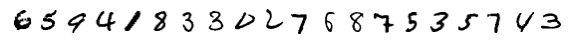

In [ ]:
c,predcts = concat_lib(image_set, how="horizontally", with_plot=True,image_indices=image_indices)

In [ ]:
print(predcts)

[6, 5, 9, 4, 1, 8, 3, 3, 0, 2, 7, 6, 8, 7, 5, 3, 5, 7, 4, 3]
